# 🚢 Titanic Survival Data Analysis (EDA)

## Dataset Overview
This dataset contains information about passengers aboard the Titanic,
including demographic details, ticket class, fare, and survival status.

## Objective
The objective of this analysis is to:
- Understand survival patterns among passengers
- Analyze the impact of factors such as gender, age, and class on survival
- Extract meaningful insights using exploratory data analysis
-------------------------------------------------------------------------------------------------------------------------------------

### Importing Labraries 

In [108]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [109]:
import matplotlib.style as style
style.use('ggplot')
plt.style.use('seaborn-v0_8')

In [110]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset 

In [111]:
data=pd.read_csv('test.csv')

### Dataset Preview 

In [112]:
# 1. Display first 5 Rows
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# 1. Display last 5 Rows
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 3. Dataset Shape (Rows and Columns).

In [114]:
print("Number of Rows    ::",data.shape[0])
print("Number of columns ::",data.shape[1])

Number of Rows    :: 891
Number of columns :: 12


This shows the total number of records (rows) and features (columns) in the dataset, helping assess the dataset size and analysis scope.

### 4.Display information about Dataset .

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Provides details about column names, data types, and non-null counts to verify data structure and data quality before analysis.

### 5.Overall Dataset Statistics

In [116]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Provides summary statistics such as count, mean, standard deviation, and value ranges, offering a quick overview of the dataset’s 
numerical features.

### 6. Check Null Values in Dataset 

In [117]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

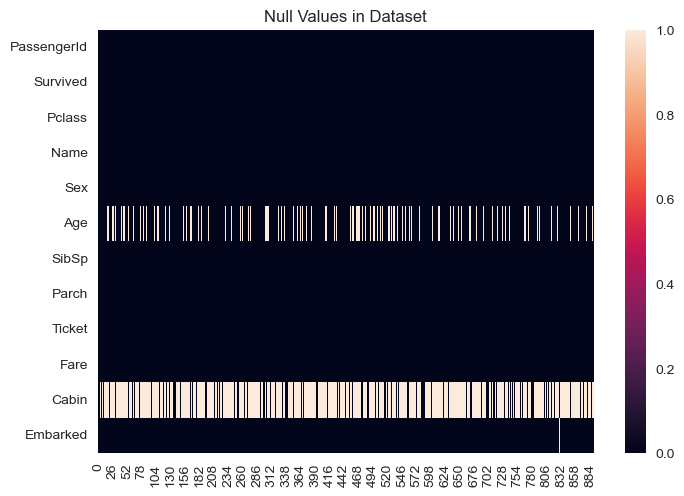

In [118]:
sns.heatmap(data.isnull().T)
plt.title("Null Values in Dataset")
plt.show()

Shows the count of missing values in each column, helping assess data completeness before further analysis.

### 7. Get Percentage of Null valuse in Dataset 

In [119]:
#Method -1 
data.isnull().sum()*100/data.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [120]:
#Method -2 
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Shows the percentage of missing values in each column, helping prioritize data cleaning efforts based on severity.

### 8. Drop Columns with High Missing Percentage

In [121]:
missing_percent=data.isnull().mean()*100

In [122]:
data = data.drop(columns=missing_percent[missing_percent > 50].index)

Removes columns with excessive missing data, improving overall data quality and reliability for analysis.

### 9 Handling Missing Values: [Age and Embarked]

In [123]:
## Fill Age 
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [124]:
## Fill Embarked 
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

Missing ages are imputed using the median to avoid outlier bias, while missing embarkation points are  
filled with the most frequent category to preserve categorical distribution.

### 10.catagorical data Encoding

In [125]:
# In Sex Feature Map Male as 1 And Feamle as 0
data['Sex']=data['Sex'].map({'male':1,'female':0})

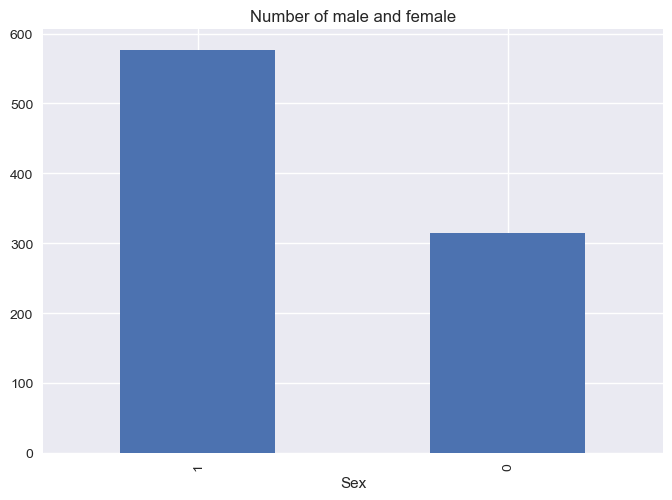

In [126]:
# Check by value count 
data['Sex'].value_counts().plot(kind='bar')
plt.title("Number of male and female")
plt.show()

<Axes: xlabel='Embarked'>

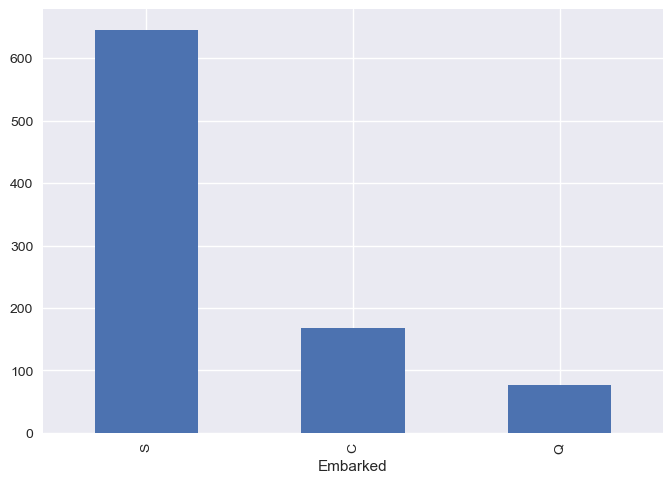

In [127]:
data['Embarked'].value_counts().plot(kind='bar')

In [128]:
data=pd.get_dummies(data,columns=['Embarked'],drop_first=True)

### 11. Count of Survived vs Not Survived

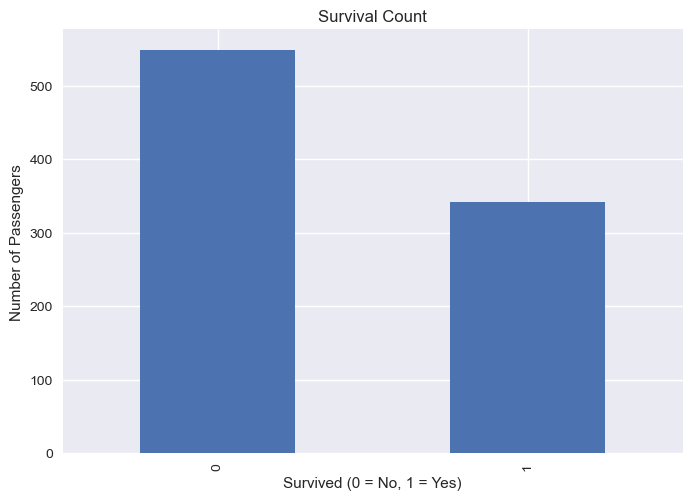

In [129]:
data['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

### 12. Survival Rate by Gender

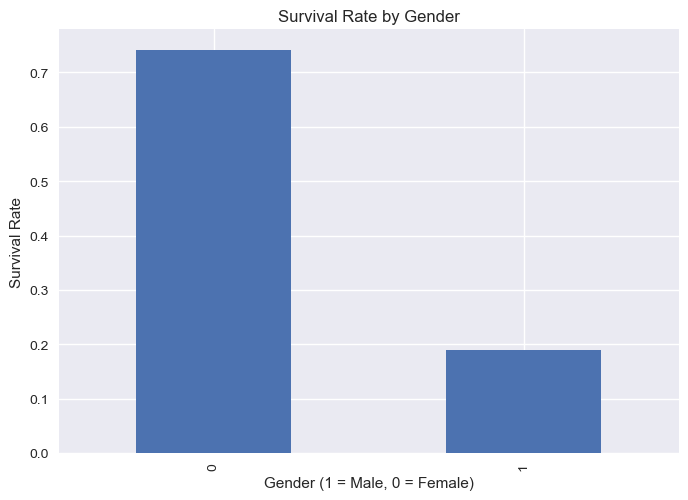

In [130]:
data.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Survival Rate")
plt.show()

Females have a significantly higher survival rate compared to males, indicating gender played a major role in survival chances.

### 13.Survival by Passenger Class (Pclass)

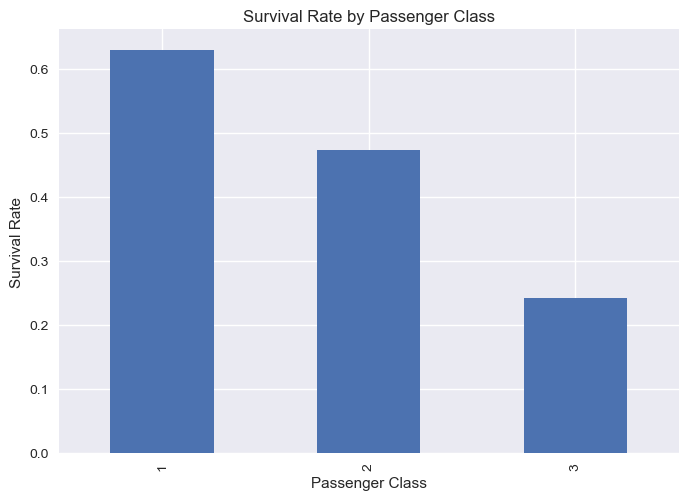

In [131]:
data.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

Passengers in higher classes had better survival rates, showing a strong relationship between socio-economic status and survival.

### 14.Age Distribution of Passengers

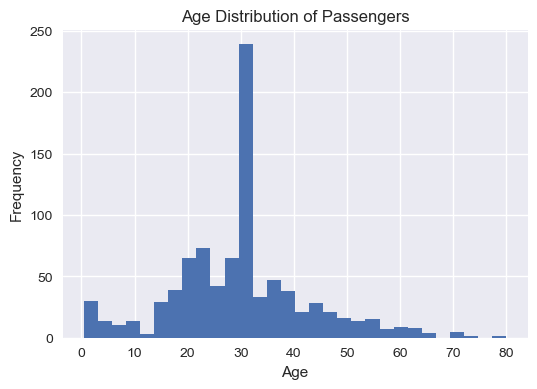

In [132]:
plt.figure(figsize=(6,4))
plt.hist(data['Age'], bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution shows a wide range of passengers, with most individuals falling in the adult age group.`

### 15.Survival Rate by Age Group

In [133]:
# Create age groups
data['AgeGroup'] = pd.cut(
    data['Age'],
    bins=[0, 12, 18, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)

data.groupby('AgeGroup')['Survived'].mean()

AgeGroup
Child     0.579710
Teen      0.428571
Adult     0.365753
Senior    0.227273
Name: Survived, dtype: float64

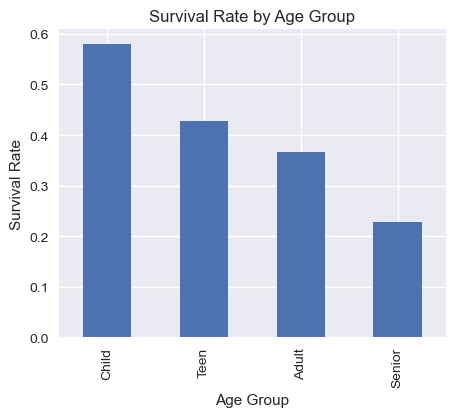

In [134]:
data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', figsize=(5,4))
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

Children show higher survival rates compared to adults and seniors, indicating age was an important factor in survival outcomes.

### Fare Distribution of Pasenger  

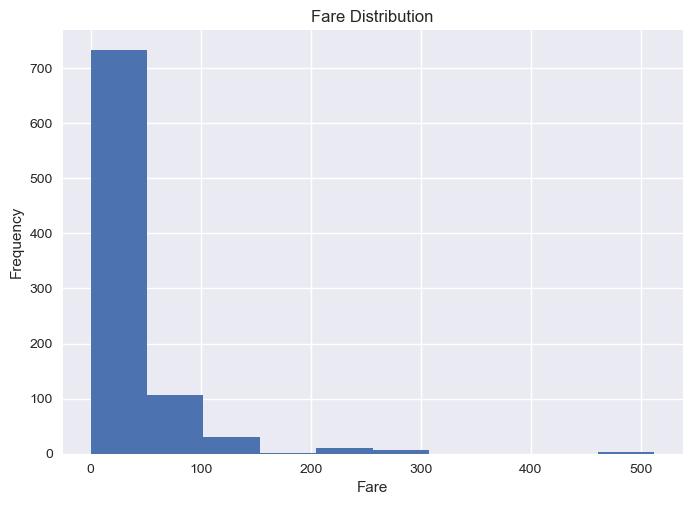

In [135]:
plt.hist(data['Fare'],bins=10)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

### Conclusion 

This exploratory data analysis of the Titanic dataset examined passenger demographics, ticket class, and fare information
to understand survival patterns. The analysis shows that survival was strongly influenced by gender and passenger class,
with females and higher-class passengers having significantly better survival rates. Age also played an important role,
as children exhibited higher chances of survival compared to adults and seniors. Fare analysis indicates a skewed distribution,
reflecting economic disparities among passengers. Overall,the study demonstrates how systematic EDA can uncover
meaningful patterns and factors that influenced survival outcomes.